In [2]:
# Import libraries 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
import warnings 
warnings.filterwarnings('ignore')

In [3]:
# Import the dataset 
df = pd.read_csv(r"E:\MLproject\hrproject\notebook\data\Performance.csv")

df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [4]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [5]:
# Missing values 
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

In [6]:
# Handling missing values 
df.dropna(inplace=True)
df.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
KPIs_met_more_than_80    0
awards_won               0
avg_training_score       0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15424 entries, 1 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            15424 non-null  int64  
 1   department             15424 non-null  object 
 2   region                 15424 non-null  object 
 3   education              15424 non-null  object 
 4   gender                 15424 non-null  object 
 5   recruitment_channel    15424 non-null  object 
 6   no_of_trainings        15424 non-null  int64  
 7   age                    15424 non-null  int64  
 8   previous_year_rating   15424 non-null  float64
 9   length_of_service      15424 non-null  int64  
 10  KPIs_met_more_than_80  15424 non-null  int64  
 11  awards_won             15424 non-null  int64  
 12  avg_training_score     15424 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ MB


In [8]:
# Check for duplicates 
df.duplicated(keep=False).sum()

3

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15422 entries, 1 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            15422 non-null  int64  
 1   department             15422 non-null  object 
 2   region                 15422 non-null  object 
 3   education              15422 non-null  object 
 4   gender                 15422 non-null  object 
 5   recruitment_channel    15422 non-null  object 
 6   no_of_trainings        15422 non-null  int64  
 7   age                    15422 non-null  int64  
 8   previous_year_rating   15422 non-null  float64
 9   length_of_service      15422 non-null  int64  
 10  KPIs_met_more_than_80  15422 non-null  int64  
 11  awards_won             15422 non-null  int64  
 12  avg_training_score     15422 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.6+ MB


In [11]:
## Rename columns 
df = df.rename(columns={'department':'Department', 'region':'Region', 'education':'Education', 'gender':'Gender', 
                        'recruitment_channel':'Recruitment Channel', 'no_of_trainings':'Total Trainings', 'age':'Age',
                        'previous_year_rating':'Previous Rating', 'length_of_service':'Tenure', 'KPIs_met_more_than_80':'KPIs > 80',
                        'awards_won':'Total Awards', 'avg_training_score':'Average Training Score'})
df.drop(columns=['employee_id'], inplace=True)

df.head()

,Department,Region,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61
5,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68


## Exploratory Data Analysis 

In [12]:
print(df.columns)

Index(['Department', 'Region', 'Education', 'Gender', 'Recruitment Channel',
       'Total Trainings', 'Age', 'Previous Rating', 'Tenure', 'KPIs > 80',
       'Total Awards', 'Average Training Score'],
      dtype='object')


In [13]:
df['Department'].unique()

array(['HR', 'Sales & Marketing', 'Procurement', 'Finance', 'Analytics',
       'Technology', 'Operations', 'Legal', 'R&D'], dtype=object)

In [14]:
df['Region'].unique()

array(['region_4', 'region_13', 'region_2', 'region_29', 'region_7',
       'region_22', 'region_16', 'region_17', 'region_24', 'region_11',
       'region_27', 'region_9', 'region_20', 'region_34', 'region_23',
       'region_8', 'region_14', 'region_26', 'region_31', 'region_19',
       'region_28', 'region_15', 'region_3', 'region_25', 'region_12',
       'region_30', 'region_10', 'region_33', 'region_32', 'region_5',
       'region_6', 'region_21', 'region_1', 'region_18'], dtype=object)

In [15]:
df['Education'].unique()

array(['Bachelors', 'Masters & above', 'Below Secondary'], dtype=object)

In [16]:
df['Gender'].nunique()

2

In [17]:
df['Recruitment Channel'].nunique()

3

### Adding New Columns (Feature Engineering)

In [18]:
def map_region_to_label(region):
    if region in ['region_1', 'region_2', 'region_3', 'region_4', 'region_5',
                  'region_6', 'region_7', 'region_8', 'region_9', 'region_10']:
        return "Region 1"
    elif region in ['region_11', 'region_12', 'region_13', 'region_14', 'region_15',
                    'region_16', 'region_17', 'region_18', 'region_19', 'region_20']:
        return "Region 2"
    elif region in ['region_21', 'region_22', 'region_23', 'region_24', 'region_25',
                    'region_26', 'region_27', 'region_28', 'region_29', 'region_30']:
        return "Region 3"
    elif region in ['region_31', 'region_32', 'region_33', 'region_34', 'region_35',
                    'region_36', 'region_37', 'region_38', 'region_39', 'region_40']:
        return "Region 4"
    else:
        return "Unknown Region"

df['Region Label'] = df['Region'].apply(map_region_to_label)
df.head()

,Department,Region,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score,Region Label
1,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51,Region 1
2,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47,Region 2
3,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65,Region 1
4,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Region 3
5,Procurement,region_7,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Region 1


In [19]:
df.drop(columns=['Region'], inplace=True)

In [20]:
df['Region Label'].unique()

array(['Region 1', 'Region 2', 'Region 3', 'Region 4'], dtype=object)

In [21]:
df.head()

,Department,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score,Region Label
1,HR,Bachelors,f,other,1,31,3.0,5,0,0,51,Region 1
2,Sales & Marketing,Bachelors,m,other,1,31,1.0,4,0,0,47,Region 2
3,Procurement,Bachelors,f,other,3,31,2.0,9,0,0,65,Region 1
4,Finance,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Region 3
5,Procurement,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Region 1


In [22]:
df['Department'].unique()

array(['HR', 'Sales & Marketing', 'Procurement', 'Finance', 'Analytics',
       'Technology', 'Operations', 'Legal', 'R&D'], dtype=object)

In [23]:
# Departments

mapping = {
    'Procurement': 'Finance & Procurement',
    'Finance': 'Finance & Procurement',
    'Analytics': 'Analytics & Technology',
    'Technology': 'Analytics & Technology',
    'Operations': 'Operations & Legal',
    'Legal': 'Operations & Legal'
}

df['Departments'] = df['Department'].replace(mapping)

# drop Department column 
df.drop(columns=['Department'], inplace=True)

df.head()

,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score,Region Label,Departments
1,Bachelors,f,other,1,31,3.0,5,0,0,51,Region 1,HR
2,Bachelors,m,other,1,31,1.0,4,0,0,47,Region 2,Sales & Marketing
3,Bachelors,f,other,3,31,2.0,9,0,0,65,Region 1,Finance & Procurement
4,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Region 3,Finance & Procurement
5,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Region 1,Finance & Procurement


In [24]:
df.describe()

,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score
count,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000,15422.000000
mean,1.247504,35.632084,3.355337,6.258138,0.361561,0.023927,63.366295
std,0.588582,7.577190,1.263761,4.115930,0.480468,0.152826,13.300812
min,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,1.000000,30.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,1.000000,34.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,1.000000,39.000000,4.000000,8.000000,1.000000,0.000000,75.000000
max,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [25]:
# Employee education  
education = df['Education'].value_counts().reset_index(name='Count').iloc[:5]
education

,Education,Count
0,Bachelors,10464
1,Masters & above,4790
2,Below Secondary,168


- Most of the employees are undergraduates with Bachelor degrees(10464), followed by those with masters (4790) and above.
- 168 employees have below secondary level education

In [26]:
# Department with most employees 
department = df['Departments'].value_counts().reset_index(name='Count').iloc[:5]
department

,Departments,Count
0,Sales & Marketing,4601
1,Operations & Legal,3571
2,Analytics & Technology,3420
3,Finance & Procurement,2793
4,HR,738


- Sales & Marketing is the department with most employees (4601) ...

In [27]:
# Employee distribution by region 
region = df['Region Label'].value_counts().reset_index(name='Count').iloc[:5]
region

,Region Label,Count
0,Region 1,6447
1,Region 3,4450
2,Region 2,3513
3,Region 4,1012


- Region 1 is the region with most employees (6447) ...

### Correlation Analysis 

### Performance by Gender

In [28]:
gender = df.groupby(['Gender']).agg({
    'Total Trainings':'sum',
    'Average Training Score': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
    'KPIs > 80':'sum',
    'Total Awards': 'sum'
}).reset_index()

# Rename columns 
gender.columns = ['Gender', 'Total Training', 'Avg Training Score', 'Avg Age', 'Avg Tenure',
                       'Total KPI>80 Achieved', 'Total Awards']

gender

,Gender,Total Training,Avg Training Score,Avg Age,Avg Tenure,Total KPI>80 Achieved,Total Awards
0,f,5405,63.768380,35.693776,6.251789,1790,121
1,m,13834,63.194802,35.605772,6.260845,3786,248


In [29]:
# Plotting a grouped bar graph

fig = px.bar(gender, x='Gender',
             y=['Total Training', 'Avg Training Score', 'Avg Age', 'Avg Tenure',
                       'Total KPI>80 Achieved', 'Total Awards'],
             title='Age Comparison',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1100,  
    height=600,  
    bargap=0.2,  
)
             
fig.show()

- Male employees underwent more trainings 
- Both gender have almost similar training scores 63
- Average age for both gender is 35
- Average tenure is about 6.2 years 
- Male employees achieved more KPIs 
- Male employees got most awarsd



### Department-wise Analysis

In [30]:
departments = df.groupby(['Departments']).agg({
    'Average Training Score': 'mean',
    'Age': 'mean',
    'Tenure': 'mean',
     'KPIs > 80':'sum',
    'Total Awards': 'sum', 
}).reset_index()

# Rename columns for clarity
departments.columns = ['Departments', 'Avg Training Score', 'Avg Department Age', 'Avg Department Tenure',
                       'Total KPI>80 Achieved', 'Total Department Awards']

departments

,Departments,Avg Training Score,Avg Department Age,Avg Department Tenure,Total KPI>80 Achieved,Total Department Awards
0,Analytics & Technology,81.815205,34.723684,5.971345,1251,90
1,Finance & Procurement,67.696026,35.865736,6.224132,1061,69
2,HR,50.388889,35.224932,6.144986,270,14
3,Operations & Legal,60.308317,36.502100,6.602632,1548,91
4,R&D,84.424749,33.304348,5.183946,137,5
5,Sales & Marketing,50.111063,35.706803,6.312541,1309,100


In [31]:
# Plotting a grouped bar graph

fig = px.bar(departments, x='Departments',
             y=['Avg Training Score', 'Avg Department Age', 'Avg Department Tenure', 'Total KPI>80 Achieved', 'Total Department Awards'],
             #labels={'value': 'Metric Value'}, 
             title='Department Comparison',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1100,  
    height=600,  
    bargap=0.2,  
)
             
fig.show()


- R&D department has the best training score 
- Operations and Legal has older employees with mean age of 36.5
- Average tenure for employees i  Operations and Legal is highest at 6.6
- Operationns and legal is the department which achieved more KPIs 
- Sales & Marketing got more awards

### Employee comparison with education 

In [32]:
df.head()

,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score,Region Label,Departments
1,Bachelors,f,other,1,31,3.0,5,0,0,51,Region 1,HR
2,Bachelors,m,other,1,31,1.0,4,0,0,47,Region 2,Sales & Marketing
3,Bachelors,f,other,3,31,2.0,9,0,0,65,Region 1,Finance & Procurement
4,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Region 3,Finance & Procurement
5,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Region 1,Finance & Procurement


In [33]:
education = df.groupby(['Education']).agg({
    'Total Trainings': 'mean', 
    'Average Training Score': 'mean',
    'Tenure': 'mean',
    'KPIs > 80':'sum',
    'Total Awards': 'sum', 
}).reset_index()

# Rename columns for clarity
education.columns = ['Education', 'Avg. Total Training', 'Avg Training Score',  'Avg Tenure', 'Total KPI>80 Achieved', 'Total Awards']

education

,Education,Avg. Total Training,Avg Training Score,Avg Tenure,Total KPI>80 Achieved,Total Awards
0,Bachelors,1.256976,63.019973,5.780199,3743,241
1,Below Secondary,1.309524,65.494048,2.297619,74,8
2,Masters & above,1.224635,64.048225,7.441127,1759,120


In [34]:
# Plotting a grouped bar graph

fig = px.bar(education, x='Education',
             y=['Education', 'Avg. Total Training', 'Avg Training Score',  'Avg Tenure', 'Total KPI>80 Achieved', 'Total Awards'],
             title='Employee Comparison by Education',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1100,  
    height=600,  
    bargap=0.2,  
)
             
fig.show()


- Employees with Below secondary require more training
- Employees with Below secondary have a higher training scores (maybe because they attend more trainings)
- Employees with masters and above have longer tenures
- Employees with bachelors achieved more KPIs
- Employees with bachelors have more awards 

In [35]:
df.head()

,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score,Region Label,Departments
1,Bachelors,f,other,1,31,3.0,5,0,0,51,Region 1,HR
2,Bachelors,m,other,1,31,1.0,4,0,0,47,Region 2,Sales & Marketing
3,Bachelors,f,other,3,31,2.0,9,0,0,65,Region 1,Finance & Procurement
4,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Region 3,Finance & Procurement
5,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Region 1,Finance & Procurement


### Recruitment Channel


In [36]:
recruitment_channel = df.groupby(['Recruitment Channel']).agg({
    'Total Trainings': 'mean', 
    'KPIs > 80':'sum',
    'Average Training Score': 'mean', 
}).reset_index()

# Rename columns for clarity
recruitment_channel .columns = ['Recruitment Channel', 'Avg. Total Training', 'Total KPI>80 Achieved', 'Avg Training Score']

recruitment_channel 

,Recruitment Channel,Avg. Total Training,Total KPI>80 Achieved,Avg Training Score
0,other,1.252223,3085,63.619125
1,referred,1.163763,160,64.585366
2,sourcing,1.244904,2331,62.974212


In [37]:
# Plotting a grouped bar graph

fig = px.bar(recruitment_channel , x='Recruitment Channel',
             y=['Avg. Total Training', 'Total KPI>80 Achieved', 'Avg Training Score'],
             title='Employee Comparison by Recruitment Channel',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1100,  
    height=600,  
    bargap=0.2,  
)
             
fig.show()


- Total training for recruitment channels are almost similar about 1.2 
- Employees recruited by other means have achieved more KPIs 
- Employees recruited from the sources almost achieved similar training scores 62

### Region 

In [38]:
region = df.groupby(['Region Label']).agg({
    'Total Trainings': 'mean', 
    'KPIs > 80':'sum',
    'Average Training Score': 'mean', 
}).reset_index()

# Rename columns for clarity
region.columns = ['Region Label', 'Avg. Total Training', 'Total KPI>80 Achieved', 'Avg Training Score']

region

,Region Label,Avg. Total Training,Total KPI>80 Achieved,Avg Training Score
0,Region 1,1.264774,2390,63.455716
1,Region 2,1.191574,1214,61.911187
2,Region 3,1.278202,1662,64.275506
3,Region 4,1.196640,310,63.849802


In [39]:
# Plotting a grouped bar graph

fig = px.bar(region , x='Region Label',
             y=['Avg. Total Training', 'Total KPI>80 Achieved', 'Avg Training Score'],
             title='Employee Comparison by Region Label',
             barmode = 'group')

# Update layout to vary length and width
fig.update_layout(
    width=1100,  
    height=600,  
    bargap=0.2,  
)
             
fig.show()


- Employees from region 3 required more training 
- Employees from region 1 achieved more KPIs 
- Employees region 3 achived highest training scores 


###  Previous Rating and Average Training Score

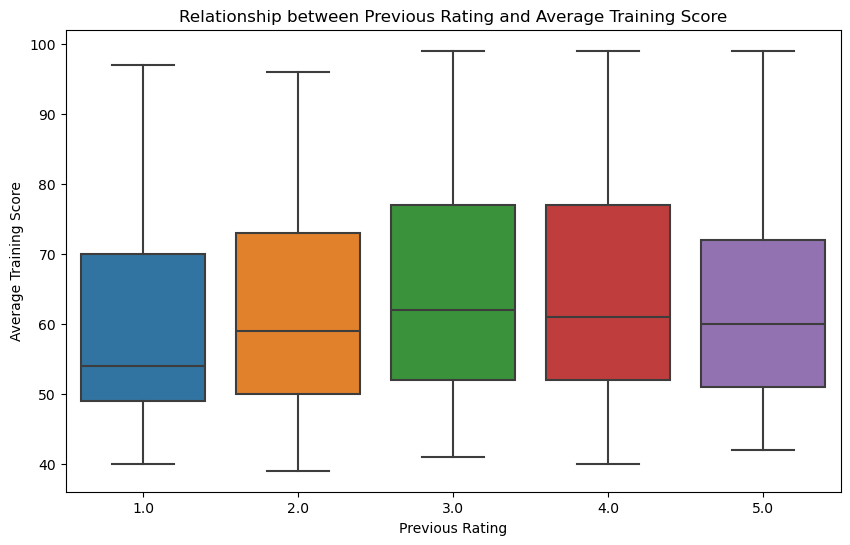

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the plot
plt.figure(figsize=(10, 6))

# Create a box plot to compare the distribution of Average Training Score across different levels of Previous Rating
sns.boxplot(x='Previous Rating', y='Average Training Score', data=df)

# Customize the plot
plt.title('Relationship between Previous Rating and Average Training Score')
plt.xlabel('Previous Rating')
plt.ylabel('Average Training Score')

# Show the plot
plt.show()


- Employees with previous rating of 3 have the highest training scores 
- Employees with previous rating 1 have the least traning scores
- Training scores seem to consolidate with pevious rating of 4 and 5

###  Total Trainings vs. Average Training Score

In [41]:
import numpy as np

# Calculate Pearson correlation coefficient
correlation = np.corrcoef(df['Total Trainings'], df['Average Training Score'])[0, 1]

print("Correlation between Total Trainings and Average Training Score:", correlation)


Correlation between Total Trainings and Average Training Score: 0.04472848435224779


-  There is a very weak positive correlation between Total Trainings and Average Training Score. In other words, there is little to no linear relationship between the total number of trainings attended by an employee and their average training score.

In [42]:
df.head()

,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score,Region Label,Departments
1,Bachelors,f,other,1,31,3.0,5,0,0,51,Region 1,HR
2,Bachelors,m,other,1,31,1.0,4,0,0,47,Region 2,Sales & Marketing
3,Bachelors,f,other,3,31,2.0,9,0,0,65,Region 1,Finance & Procurement
4,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Region 3,Finance & Procurement
5,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Region 1,Finance & Procurement


In [43]:
df.head()

,Education,Gender,Recruitment Channel,Total Trainings,Age,Previous Rating,Tenure,KPIs > 80,Total Awards,Average Training Score,Region Label,Departments
1,Bachelors,f,other,1,31,3.0,5,0,0,51,Region 1,HR
2,Bachelors,m,other,1,31,1.0,4,0,0,47,Region 2,Sales & Marketing
3,Bachelors,f,other,3,31,2.0,9,0,0,65,Region 1,Finance & Procurement
4,Bachelors,m,sourcing,1,30,4.0,7,0,0,61,Region 3,Finance & Procurement
5,Bachelors,m,sourcing,1,36,3.0,2,0,0,68,Region 1,Finance & Procurement


In [46]:
# Import models 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

# Evaluation modules
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [51]:
 # Splitting data to training and testing 

# drop null values
df = df.dropna()

# Features
X = df.drop(columns = ['Average Training Score'], axis=1)

# Target variable 
y = df['Average Training Score']

In [52]:
X.shape

(15422, 11)

In [53]:
y.shape

(15422,)

## One hot encoding 

In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Numeric features 
numeric_features = X.select_dtypes(exclude = 'object').columns 
# Categorical features 
categorical_features = X.select_dtypes(include = 'object').columns

#numeric_transformer = StandardScaler()
#categorical_transformer = OneHotEncoder()

preprocessor = make_column_transformer(
    (StandardScaler(), numeric_features),
    (OneHotEncoder(), categorical_features),
    remainder="passthrough"
)



In [55]:
X = preprocessor.fit_transform(X)

In [56]:
# split dataset into training  and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [58]:
# Define the models

models = {
    'Random Forest Regressor':RandomForestRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'XGBRegressor': XGBRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
}

# Initialize a dictionary to store results
results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R2': []}

# Create a loop to iterate over the models

for model_name, model in models.items():
    # Fit the model to training data
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluating the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R2'].append(r2)

# Create a DataFrame for results in dictionary
results_df = pd.DataFrame(results)

results_df.head(6)

,Model,MAE,MSE,RMSE,R2
0,Random Forest Regressor,3.530035,29.217486,5.405320,0.835399
1,KNeighborsRegressor,4.341517,41.464335,6.439281,0.766404
2,XGBRegressor,3.354402,27.235972,5.218809,0.846562
3,DecisionTreeRegressor,4.849398,57.417531,7.577436,0.676529


In [59]:
def model(X_train, y_train, X_test, y_test):
    # Initialize the XGBRegressor model
    xgb_model = XGBRegressor()

    # Fit the model on the entire training data
    xgb_model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = xgb_model.predict(X_test)

    # Evaluate the model on the testing data
    mae_test = mean_absolute_error(y_test, y_pred)
    r2_test = r2_score(y_test, y_pred)
    mse_test = mean_squared_error(y_test, y_pred)
    rmse_test = np.sqrt(mse_test)

    # Return the evaluation metrics
    return mae_test, r2_test, mse_test, rmse_test

# Example usage:
# Assuming you have defined X_train, y_train, X_test, and y_test
mae_test, r2_test, mse_test, rmse_test = model(X_train, y_train, X_test, y_test)

print("MAE:", mae_test)
print("R2:", r2_test)
print("MSE:", mse_test)
print("RMSE:", rmse_test)

MAE: 3.3544021162895037
R2: 0.8465618482719741
MSE: 27.235971730615542
RMSE: 5.218809416966243


### Plot y_pred and y_test 

Text(0, 0.5, 'Predicted')

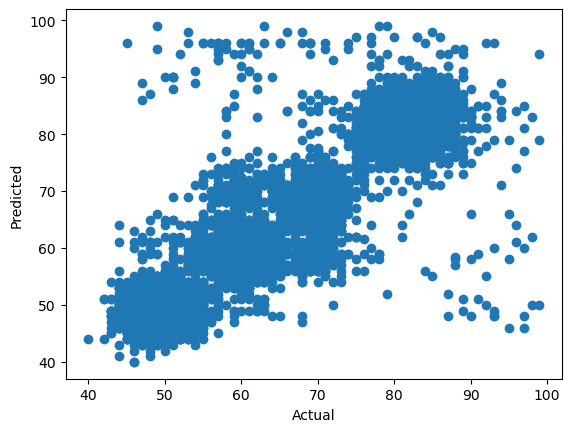

In [60]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')